# Use classification technique for prediction of Graduate Admissions from an Indian perspective

## Importing libraries and datasets

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv("C:\mahua\Projects\Internsavy\Admission_Predict.csv")

In [3]:
dataset.head()

,Sr.No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Admission_Chances
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
dataset.tail()

,Sr.No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Admission_Chances
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [5]:
dataset.shape

(400, 9)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sr.No.             400 non-null    int64  
 1   GRE_Score          400 non-null    int64  
 2   TOEFL_Score        400 non-null    int64  
 3   University_Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Admission_Chances  400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [7]:
dataset.describe()

,Sr.No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Admission_Chances
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## Data Visualisation 

### Correlation matrix 

In [8]:
corr_mat=dataset.corr()

### Creating the heatmap of correlation matrix

<Axes: >

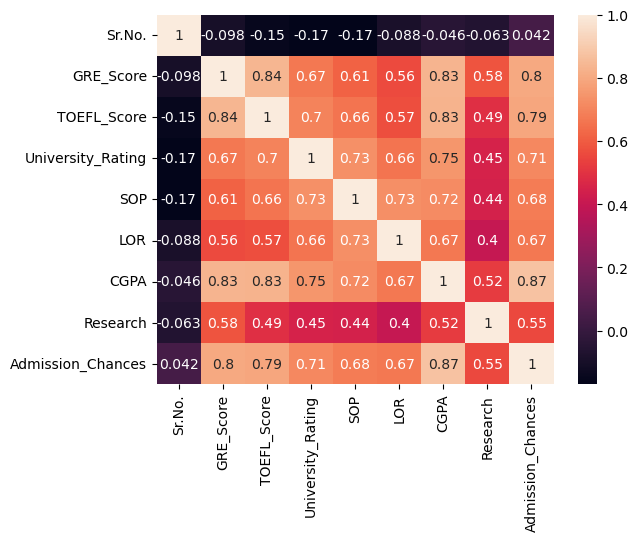

In [9]:
sns.heatmap(data=corr_mat,annot=True)

### Admission Chances 

Dividing chances of admission into 3 categories and creating a column named 'Admission_Probability'.
**If the Chances of Admission is 0.5 or lesser, Probability of admission in University is 'LOW'.
**If the Chances of Admission is between 0.5 and 0.85, Probability of admission in University is 'MID'.
**If the Chances of Admission is 0.85 or more, Probability of admission in University is 'HIGH'.

In [10]:
dataset['Admission_Probability']=pd.cut(dataset['Admission_Chances'],bins=[0,0.5,0.85,1.0],labels=['LOW','MID','HIGH'])

In [11]:
dataset

,Sr.No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Admission_Chances,Admission_Probability
0,1,337,118,4,4.5,4.5,9.65,1,0.92,HIGH
1,2,324,107,4,4.0,4.5,8.87,1,0.76,MID
2,3,316,104,3,3.0,3.5,8.00,1,0.72,MID
3,4,322,110,3,3.5,2.5,8.67,1,0.80,MID
4,5,314,103,2,2.0,3.0,8.21,0,0.65,MID
...,...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82,MID
396,397,325,107,3,3.0,3.5,9.11,1,0.84,MID
397,398,330,116,4,5.0,4.5,9.45,1,0.91,HIGH
398,399,312,103,3,3.5,4.0,8.78,0,0.67,MID


In [12]:
dataset.isna().any()

Sr.No.                   False
GRE_Score                False
TOEFL_Score              False
University_Rating        False
SOP                      False
LOR                      False
CGPA                     False
Research                 False
Admission_Chances        False
Admission_Probability    False
dtype: bool

In [13]:
probab_count=dataset.Admission_Probability.value_counts()
probab_count

MID     282
HIGH     83
LOW      35
Name: Admission_Probability, dtype: int64

<Axes: xlabel='Admission_Probability', ylabel='count'>

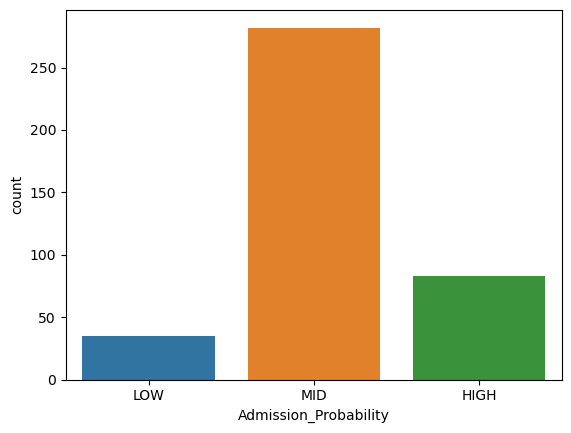

In [14]:
sns.countplot(x='Admission_Probability',data=dataset)

### Effect of research paper published in Admission process 

In [15]:
research_count=dataset.Research.value_counts()
research_count

1    219
0    181
Name: Research, dtype: int64

([<matplotlib.patches.Wedge at 0x1e10213ece0>,
 [Text(-0.1635397261721476, 1.087775141269343, 'Research Submitted'),
  Text(0.16353972617214768, -1.087775141269343, 'Research Not Submitted')],
 [Text(-0.08920348700298959, 0.5933318952378234, '54.8%'),
  Text(0.08920348700298963, -0.5933318952378234, '45.2%')])

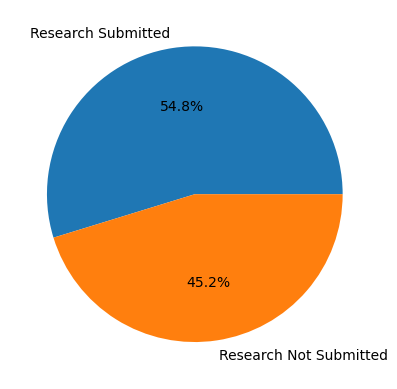

In [16]:
plt.pie(research_count,labels=['Research Submitted','Research Not Submitted'],autopct="%1.1f%%")

<Axes: xlabel='Research', ylabel='count'>

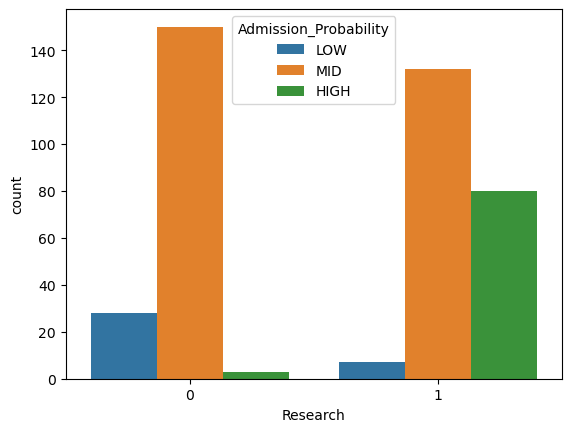

In [17]:
sns.countplot(data=dataset,x='Research',hue='Admission_Probability')

#### >> The students who completed the Research work have higher chances of getting an admission in the University.

### CGPA vs Admission Probability

<Axes: xlabel='CGPA', ylabel='Admission_Chances'>

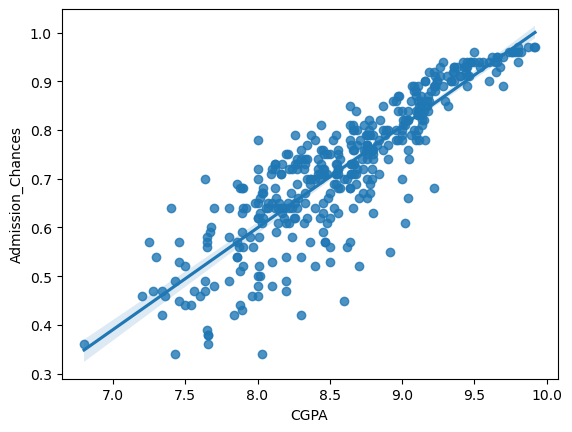

In [18]:
sns.regplot(x='CGPA',y='Admission_Chances',data=dataset)

#### >> Higher the CGPA, higher is the Chances of Admission 

### University Ranking vs Admission Chances

<Axes: xlabel='University_Rating', ylabel='count'>

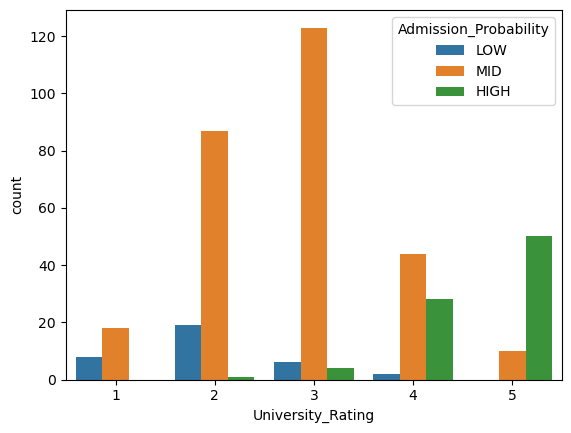

In [19]:
sns.countplot(x='University_Rating',hue='Admission_Probability',data=dataset)

Text(0.5, 1.0, 'Admission Chances by University Rating')

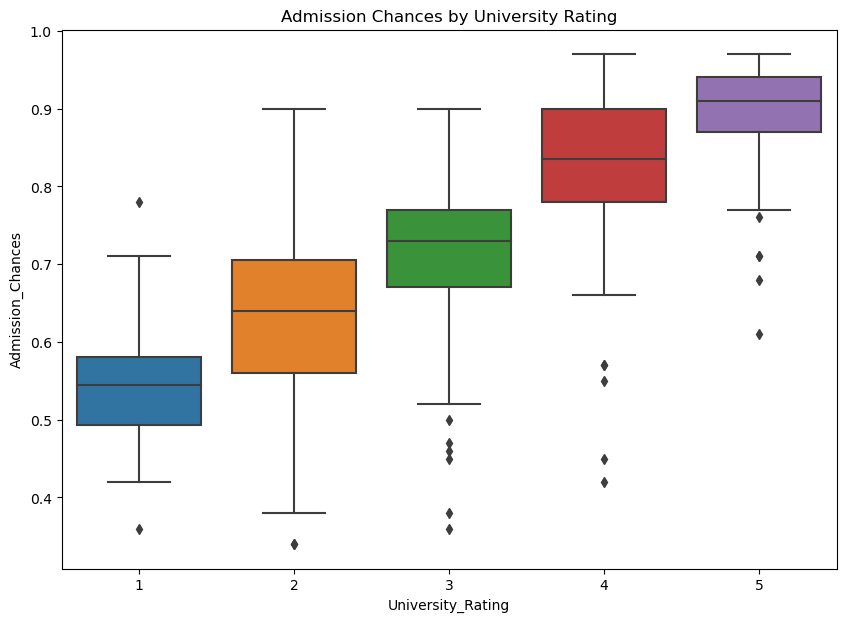

In [20]:
plt.figure(figsize=(10,7))
sns.boxplot(x='University_Rating',y='Admission_Chances',data=dataset)
plt.title("Admission Chances by University Rating")

#### >> Students with higher Admission chances get into University with higher rating.

### Visualisation on basis of Scores 

### Effect of TOEFL score on admission 
#### TOEFL score - Standardized test used to measure the English-language ability of non-native speakers wishing to enroll in English-speaking universities. Which implies the frequency of admission of foreign student

<Axes: xlabel='TOEFL_Score', ylabel='count'>

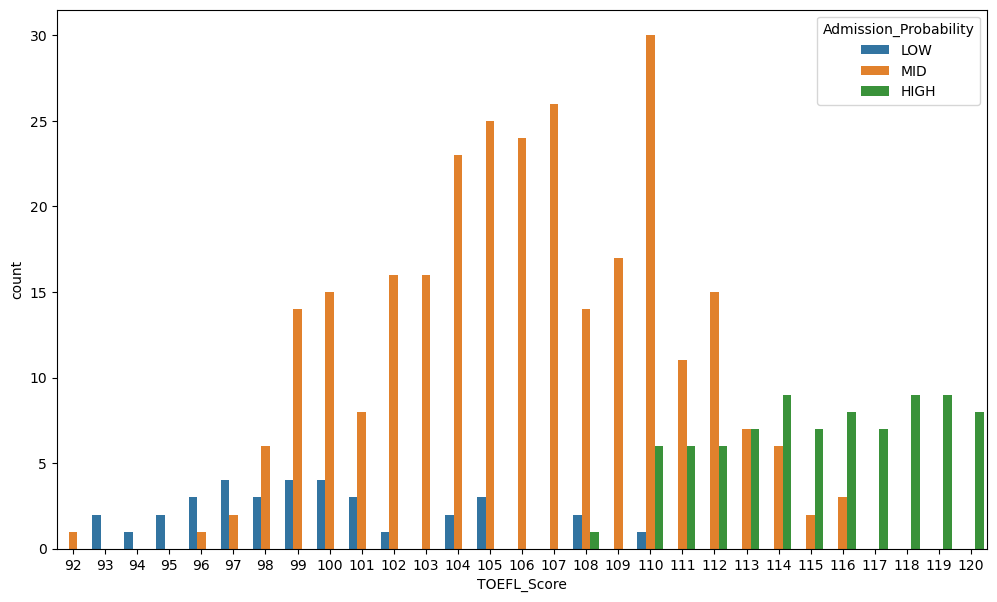

In [21]:
plt.figure(figsize=(12,7))
sns.countplot(x='TOEFL_Score',hue='Admission_Probability',data=dataset)

### Admission chances with respect to GRE_Score

<Axes: xlabel='GRE_Score', ylabel='count'>

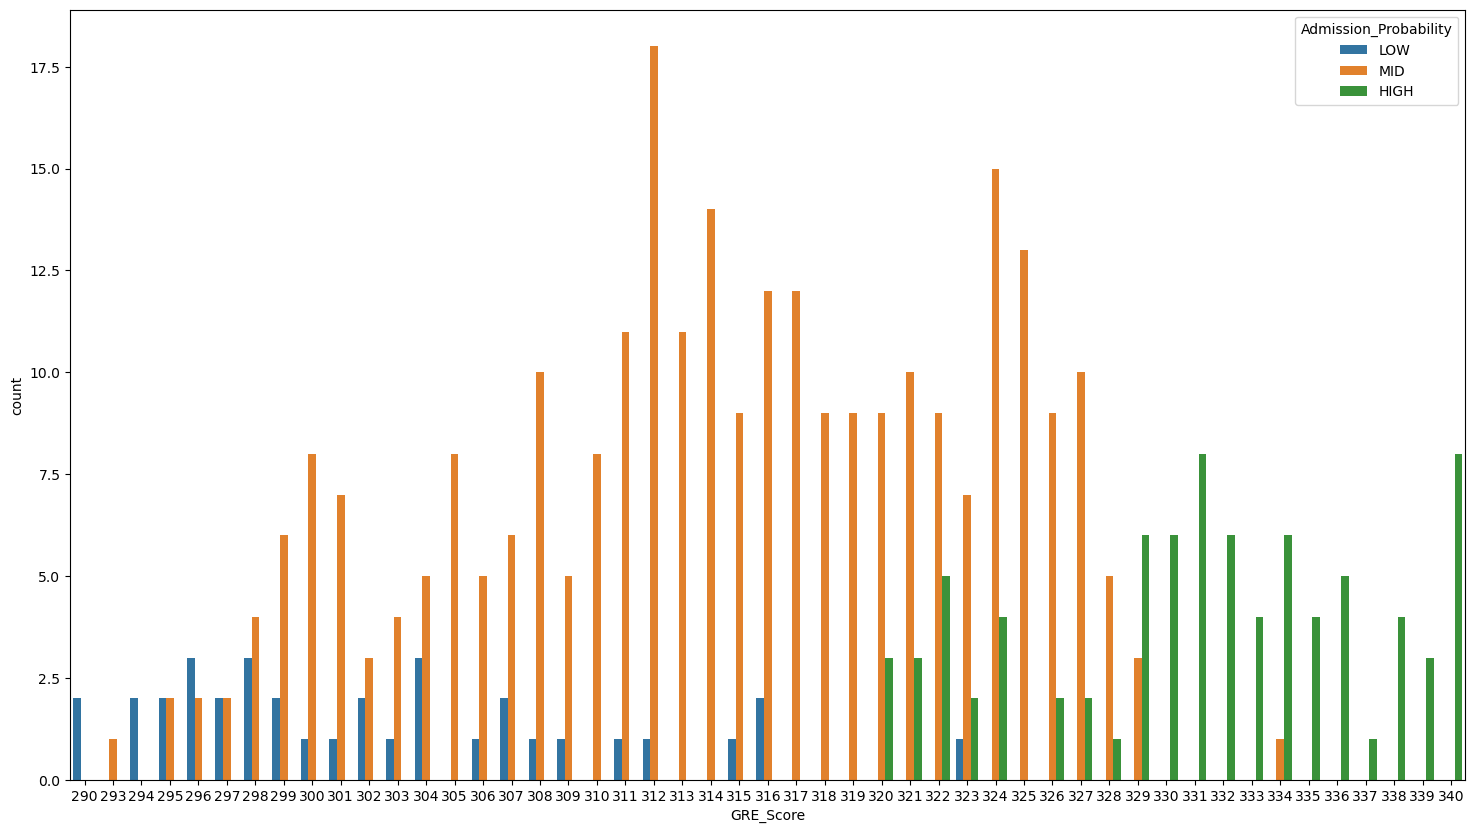

In [22]:
plt.figure(figsize=(18,10))
sns.countplot(x='GRE_Score',hue='Admission_Probability',data=dataset)

### Analysing scores above the cut-off 

#### The cut-off GRE Score is 320 and TOEFL Score is 100

In [23]:
co_gre=dataset[dataset["GRE_Score"]>=320]
co_toefl=dataset[dataset["TOEFL_Score"]>=100]

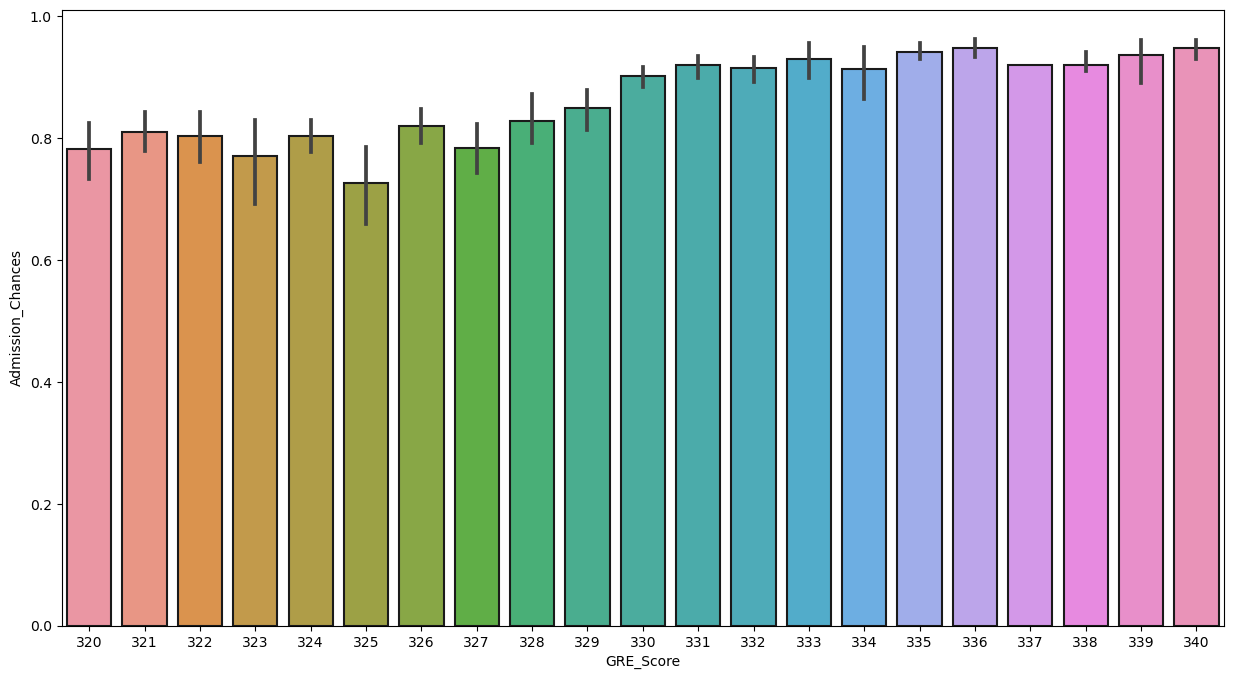

In [24]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='GRE_Score',y='Admission_Chances',data=co_gre, linewidth=1.5,edgecolor="0.1")
plt.show()

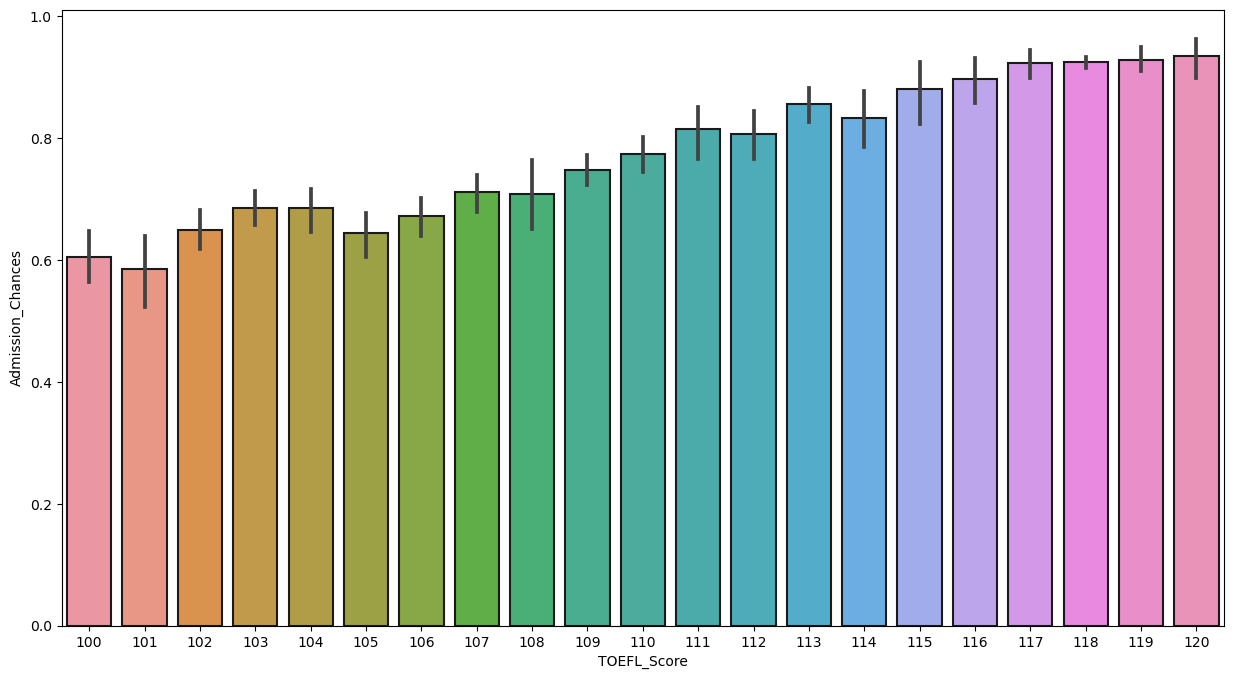

In [25]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='TOEFL_Score',y='Admission_Chances',data=co_toefl, linewidth=1.5,edgecolor="0.1")
plt.show()

#### >> The Graphs clearly represent that higher the marks, higher are chances of admission

### Letter of Recomendation and Admission Probability

In [26]:
dataset.LOR.value_counts()

3.0    85
4.0    77
3.5    73
4.5    45
2.5    39
2.0    38
5.0    35
1.5     7
1.0     1
Name: LOR, dtype: int64

<Axes: xlabel='LOR', ylabel='count'>

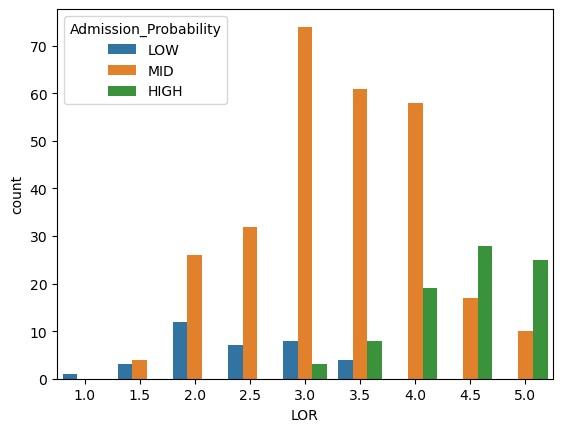

In [27]:
sns.countplot(x="LOR",hue='Admission_Probability',data=dataset)

## EDA

### Handling Missing Values

In [28]:
dataset.isnull().sum()

Sr.No.                   0
GRE_Score                0
TOEFL_Score              0
University_Rating        0
SOP                      0
LOR                      0
CGPA                     0
Research                 0
Admission_Chances        0
Admission_Probability    0
dtype: int64

#### >> No null values present 

### Dropping unnecessary columns

In [29]:
dataset.dtypes

Sr.No.                      int64
GRE_Score                   int64
TOEFL_Score                 int64
University_Rating           int64
SOP                       float64
LOR                       float64
CGPA                      float64
Research                    int64
Admission_Chances         float64
Admission_Probability    category
dtype: object

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Sr.No.                 400 non-null    int64   
 1   GRE_Score              400 non-null    int64   
 2   TOEFL_Score            400 non-null    int64   
 3   University_Rating      400 non-null    int64   
 4   SOP                    400 non-null    float64 
 5   LOR                    400 non-null    float64 
 6   CGPA                   400 non-null    float64 
 7   Research               400 non-null    int64   
 8   Admission_Chances      400 non-null    float64 
 9   Admission_Probability  400 non-null    category
dtypes: category(1), float64(4), int64(5)
memory usage: 28.8 KB


In [31]:
dataset.drop(['Sr.No.','Admission_Probability'],axis=1,inplace=True)

In [32]:
dataset.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Admission_Chances
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Model Building

In [33]:
x=dataset.drop("Admission_Chances",axis=1)
y=dataset['Admission_Chances']

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#### Admission_Chances greater than 0.85 are classified as 1

In [35]:
y_train_cla = [1 if each > 0.85 else 0 for each in y_train]
y_test_cla = [1 if each > 0.85 else 0 for each in y_test]

## Logistic Regression Model 

In [36]:
lgm=LogisticRegression()

In [37]:
lgm.fit(x_train,y_train_cla)

LogisticRegression()

In [38]:
lgm_pred = lgm.predict(x_test)

In [39]:
print(classification_report(y_test_cla,lgm_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        59
           1       0.94      0.76      0.84        21

    accuracy                           0.93        80
   macro avg       0.93      0.87      0.90        80
weighted avg       0.93      0.93      0.92        80



In [40]:
lscore=round(lgm.score(x_train,y_train_cla)*100,2)
print(round(lscore,2,),"%")

92.81 %


## Decision Tree Classifier

In [41]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train_cla)

DecisionTreeClassifier()

In [42]:
dtc_pred=dtc.predict(x_test)

In [43]:
dscore=round(dtc.score(x_train,y_train_cla)*100,2)
print(round(dscore,2,),"%")

100.0 %


## Random Forest Classifier

In [44]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train_cla)

RandomForestClassifier()

In [45]:
rfc_pred=rfc.predict(x_test)

In [46]:
print(classification_report(y_test_cla,rfc_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        59
           1       0.91      0.95      0.93        21

    accuracy                           0.96        80
   macro avg       0.95      0.96      0.95        80
weighted avg       0.96      0.96      0.96        80



In [47]:
rscore=round(rfc.score(x_train,y_train_cla)*100,2)
print(round(rscore,2,),"%")

100.0 %


## Gaussian Naive Bayes 

In [48]:
gnb=GaussianNB()

In [49]:
gnb.fit(x_train,y_train_cla)

GaussianNB()

In [50]:
gnb_pred=gnb.predict(x_test)

In [51]:
print(classification_report(y_test_cla,gnb_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        59
           1       0.91      1.00      0.95        21

    accuracy                           0.97        80
   macro avg       0.96      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



In [52]:
gscore=round(gnb.score(x_train,y_train_cla)*100,2)
print(round(gscore,2,),"%")

95.62 %


In [53]:
classifier=[]
classifier.append(rscore)
classifier.append(dscore)
classifier.append(lscore)
classifier.append(gscore)
label=['RFC','DTC','LGM','GNB']

Text(0.5, 1.0, 'Accuracy')

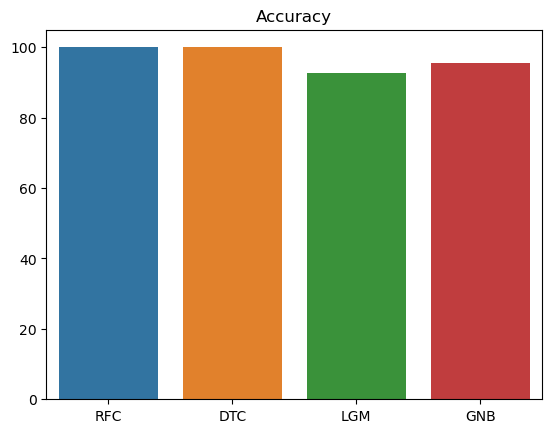

In [54]:
sns.barplot(x=label,y=classifier)
plt.title('Accuracy')

### >>Conclusion:
#### Highest Score of Accuracy is obtained using Random Forest Classifier and Decision Tree Classifier.
#### Random Forest is more robust and accurate than any other Classification Models